# Capstone Project

## Background

Woah time really flies and you already reached the last sprint of the second module in the course! You should be proud of yourself. In the past three sprints you were gaining precious knowledge that helped you acquire data engineering skills. Now you should know what good Python code looks like, why OOP is used, how to structure a Python project, how to work with SQL, how to develop and deploy a web application. All these skills will enable you to make outstanding projects that not only cover data analysis and modeling but also making your discoveries reachable to other people.

Now the time has come to put all your learnings into one place and complete the second capstone project of the course. During this project, you will have to create a Python package, collect dataset using data scraping technique, train model and deploy it for others to reach.

Most importantly you will have to create the whole E2E Machine Learning plan: establish the problem, collect dataset, train model, evaluate it and deploy it. By completing this project, you will strengthen your data engineering skills and prove to yourself and others that you are capable of planning and executing data science projects.

<div style="text-align: center;">
<img src="https://miro.medium.com/max/700/1*x7P7gqjo8k2_bj2rTQWAfg.jpeg"/ width="300px">
</div>

---

## Requirements
The whole capstone project requires you to execute full-featured E2E Machine Learning Project so let's see what actually do you have to complete:

### Define problem you want to solve
This is the part where you have to select a problem. Here are the topics that you can choose from: text classification, price prediction, item category classification. Through the second module of the course, you saw a few examples of datasets that could be used to solve these problems (eBay listings, Reddit posts, Twitter tweets). In this stage you have to:
- Define the problem and create a short presentation
- Explain what do you want to solve, and what is the potential value of your solution
- Define the data source you will collect data from

### Collecting data
During this stage, you will need to create a Python package that is able to scrape a specific website. You saw many examples during the period of the second module, where functions that take few arguments (`keywords`, `number of samples`, etc.) and outputs pandas `DataFrame`s were created. Now you will need to transform this functionality into a Python package that is installable through pip.
- Create Python package that is able to scrape specific webpage
- The package should be installable through `pip`
- The package should meed all expected Python package standards: clean code, tests, documentation.
- Collect and process dataset using your created package

### Training and saving the model
During this step, you will need to use your collected data to train, test, and save a machine learning model. Do not spend much time on this step just make sure that:
- Correct machine learning algorithm is selected
- Model is successfully trained (remember first module of the course)
- Model is saved for later deployment

### Creating API for the trained model
This is the step you have done at least a couple of times. You will need to create an API using Flask. While creating the application you will need to do these things:
- Load trained model
- Create inference pipeline
- Create `POST` route to reach model and send its outputs as a response

### Tracking model's predictions
Now you will need to enable model's predictions tracking. During this step, you will need to connect your flask application to the PostgreSQL database hosted by Heroku and put the model's inputs and outputs into one table:
- Create PostgreSQL database hosted by Heroku
- Create table for predictions tracking. There should be columns for inputs and outputs of model
- At every request of model insert required values to the database
- Create new route in Flask application that returns 10 most recent requests and responses in JSON format

### Deploying the application
After completing all the steps required above, you will need to deploy your application to Heroku. You will need to follow the steps provided in the fourth lesson of this sprint.
- Make sure all secrets and passwords are set as ENV variables in Heroku
- Deploy application to Heroku
- Ensure that your application is accessible (provide link to it)

---

Problem: I like motorcycles, want to know more and know correct price

## Evaluation criteria
- All requirements are met
- The project is well thought out. Defined problem is clearly presented
- Model actually works, is able to make predictions that make sense
- Written code is clear and clean. All the PEP8 standards are met

In [ ]:
!pip install beautifulsoup4

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [50]:
def collect_urls(pages_number: int) -> list:
    """ Scrape url for number of pages and a keyword
    and returns a pandas dataframe"""
    km = []
    keywords = ['kawasaki', 'honda', 'bmw', 'ktm', 'yamaha']

    for page_no in range(1, pages_number + 1):
        for keyword in keywords:
            url = f"https://www.autoscout24.nl/lst-moto/{keyword}?sort=standard&desc=0&offer=N%2CU&ustate=N%2CU&size=20&page={page_no}"
        # url = f"https://www.autoscout24.nl/lst-moto?sort=standard&desc=0&ustate=N%2CU&size=20&page={page_no}"
        
            print(page_no)

            headers = {"User-Agent": "Mozilla/5.0"}
            page = requests.get(url, headers=headers)
            soup = BeautifulSoup(page.content, "html.parser")

            km.extend([value["href"] for value in soup.find_all(attrs={"data-item-name": "detail-page-link"})])

    return km




def collect_info(search_list: list) -> pd.DataFrame:
    """ Scrape url for number of pages and a keyword
    and returns a pandas dataframe"""
    brand, price, km, kw, registration, category, cilinder_content, fuel = ([] for i in range(8))

    for urls in search_list:
        url = f"https://www.autoscout24.nl{urls}"

        headers = {"User-Agent": "Mozilla/5.0"}
        page = requests.get(url, headers=headers)
        soup = BeautifulSoup(page.content, "html.parser")
        # registration.extend([value.text for value in soup.find_all(attrs={"data-type": "first-registration"})])

        # Price
        try:
          path = soup.find("div", class_="cldt-price")
          anchor = path.find("h2")
          price.extend([anchor.text])
        except:
          price.extend([None])

        # KM
        try:
          path = soup.find("span", class_="cldt-stage-primary-keyfact")
          km.extend([path.text])
        except:
          km.extend([None])

        # KW
        try:
          path = soup.find_all("span", class_="cldt-stage-primary-keyfact")
          kw.extend([path[2].text])
        except:
          kw.extend([None])

        # Registration
        try:
          path = soup.find("dt", text="Bouwjaar")
          anchor = path.find_next_sibling("dd").text
          registration.extend([anchor])
        except:
          registration.extend([None])

        # Brand
        try:
          path = soup.find("dt", text="Merk")
          anchor = path.find_next_sibling("dd").text
          brand.extend([anchor])
        except:
          brand.extend([None])

         # Category
        try:
          path = soup.find("dt", text="Categorie")
          anchor = path.find_next_sibling("dd").text
          category.extend([anchor])
        except:
          category.extend([None])

        # Owners
        # try:
        #   path = soup.find("dt", text="Vorige eigenaren")
        #   anchor = path.find_next_sibling("dd").text
        #   owners.extend([anchor])
        # except:
        #   owners.extend([None])

        # Gears
        # try:
        #   path = soup.find("dt", text="Versnellingen")
        #   anchor = path.find_next_sibling("dd").text
        #   gears.extend([anchor])
        # except:
        #   gears.extend([None])

         # Fuel
        try:
          path = soup.find("dt", text="Brandstof")
          anchor = path.find_next_sibling("dd").text
          fuel.extend([anchor])
        except:
          fuel.extend([None])

        # Cilinders
        # try:
        #   path = soup.find("dt", text="Cilinders")
        #   anchor = path.find_next_sibling("dd").text
        #   cilinders.extend([anchor])
        # except:
        #   cilinders.extend([None])

        # Cilinder_content
        try:
          path = soup.find("dt", text="Cilinderinhoud")
          anchor = path.find_next_sibling("dd").text
          cilinder_content.extend([anchor])
        except:
          cilinder_content.extend([None])

        # Seats
        # try:
        #   path = soup.find("dt", text="Stoelen")
        #   anchor = path.find_next_sibling("dd").text
        #   seats.extend([anchor])
        # except:
        #   seats.extend([None])

    dict_ = {
        "brand": brand,
        "price": price,
        "milage": km,
        "power": kw,
        "new": category,
        "first_registration": registration,
        # "gears": gears,
        # "previous_owners": owners,
        "fuel": fuel,
        # "cilinders": cilinders,
        "cilinder_content": cilinder_content
        # "seats": seats
    }

    df = pd.DataFrame.from_dict(dict_, orient='index')
    df = df.transpose()

    return df


In [ ]:
list_try = collect_urls(10)

In [6]:
print(len(list_try))

1000


In [51]:
df = collect_info(list_try)

In [52]:
df.head()

,brand,price,milage,power,new,first_registration,fuel,cilinder_content
0,\nKawasaki\n,"\n€ 3.950,-\n",25.000 km,25 kW,\nGebruikt\n,\n1996\n,\nBenzine\n,\n805 cm³\n
1,\nKawasaki\n,"\n€ 4.395,-\n",- km,11 kW,\nNieuw\n,\n2021\n,\nBenzine\n,\n125 cm³\n
2,\nKawasaki\n,"\n€ 4.695,-\n",- km,11 kW,\nNieuw\n,\n2021\n,\nBenzine\n,\n125 cm³\n
3,\nKawasaki\n,"\n€ 5.595,-\n",33.000 km,47 kW,\nGebruikt\n,\n1999\n,\nBenzine\n,\n1.471 cm³\n
4,\nKawasaki\n,"\n€ 6.289,-\n",18.043 km,50 kW,\nGebruikt\n,\n2018\n,\nBenzine\n,\n649 cm³\n


In [53]:
df.shape

(1000, 8)

In [10]:
df.columns

Index(['brand', 'price', 'milage', 'power', 'category', 'first_registration',
       'fuel', 'cilinder_content'],
      dtype='object')

In [54]:
for column in df.columns:
  df[column] = df[column].str.replace('.', '')
  df[column] = df[column].str.replace('\n', '')
  if column is 'price':
    df.price = df.price.str.extract('(\d+)')
  elif column is 'cilinder_content':
    df.cilinder_content = df.cilinder_content.str.extract('(\d+)')
  elif column is 'power':
    df.power = df.power.str.extract('(\d+)')
  elif column is 'milage':
    df.milage = df.milage.str.extract('(\d+)')


df.head()

,brand,price,milage,power,new,first_registration,fuel,cilinder_content
0,Kawasaki,3950,25000,25,Gebruikt,1996,Benzine,805
1,Kawasaki,4395,NaN,11,Nieuw,2021,Benzine,125
2,Kawasaki,4695,NaN,11,Nieuw,2021,Benzine,125
3,Kawasaki,5595,33000,47,Gebruikt,1999,Benzine,1471
4,Kawasaki,6289,18043,50,Gebruikt,2018,Benzine,649


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   brand               999 non-null    object
 1   price               999 non-null    object
 2   milage              828 non-null    object
 3   power               966 non-null    object
 4   new                 999 non-null    object
 5   first_registration  779 non-null    object
 6   fuel                941 non-null    object
 7   cilinder_content    735 non-null    object
dtypes: object(8)
memory usage: 62.6+ KB


In [56]:
df[["price", "milage", "power", "cilinder_content", "first_registration"]] = df[["price", "milage", "power", "cilinder_content", "first_registration"]].apply(pd.to_numeric)

In [58]:
df.new.value_counts()

Gebruikt    769
Nieuw       230
Name: new, dtype: int64

In [59]:
df.brand.value_counts()

Honda       200
BMW         200
Yamaha      200
KTM         200
Kawasaki    199
Name: brand, dtype: int64

In [60]:
df.fuel.value_counts()

Benzine       831
Super 95       45
Overig         41
Tweetakt       18
Elektrisch      5
Diesel          1
Name: fuel, dtype: int64

#### linear regression

In [62]:
df_lin = df

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [ ]:
# Add categorised values
# full_df['state_cat'] = full_df['state'].astype('category').cat.codes

In [65]:
df_lin.new = pd.get_dummies(data=df_lin['new'], drop_first=True)

In [68]:
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [77]:
df_lin['fuel'] = calc_smooth_mean(df_lin, by='fuel', on='price', m=15)
df_lin['brand'] = calc_smooth_mean(df_lin, by='brand', on='price', m=15)

In [79]:
# Drop NaN values
column_names = df_lin.columns
df_lin.dropna(subset=column_names, inplace=True)
df_lin = df_lin.reset_index(drop=True)
df_lin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               489 non-null    float64
 1   price               489 non-null    float64
 2   milage              489 non-null    float64
 3   power               489 non-null    float64
 4   new                 489 non-null    uint8  
 5   first_registration  489 non-null    float64
 6   fuel                489 non-null    float64
 7   cilinder_content    489 non-null    float64
dtypes: float64(7), uint8(1)
memory usage: 27.3 KB


In [80]:
import numpy as np

# Get the correlation matrix
model_array = np.array([df_lin['brand'], df_lin['price'], df_lin['milage'],df_lin['fuel'],df_lin['new'],df_lin['power'],df_lin['first_registration'],df_lin['cilinder_content']])
corr_matrix_model = np.corrcoef(model_array).round(decimals=2)
print(corr_matrix_model)

[[ 1.    0.3   0.18  0.07   nan  0.25 -0.02  0.33]
 [ 0.3   1.   -0.33  0.1    nan  0.52  0.34  0.5 ]
 [ 0.18 -0.33  1.    0.08   nan  0.   -0.47  0.12]
 [ 0.07  0.1   0.08  1.     nan  0.16  0.12  0.23]
 [  nan   nan   nan   nan   nan   nan   nan   nan]
 [ 0.25  0.52  0.    0.16   nan  1.    0.27  0.71]
 [-0.02  0.34 -0.47  0.12   nan  0.27  1.    0.12]
 [ 0.33  0.5   0.12  0.23   nan  0.71  0.12  1.  ]]


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


<Figure size 1440x1440 with 0 Axes>

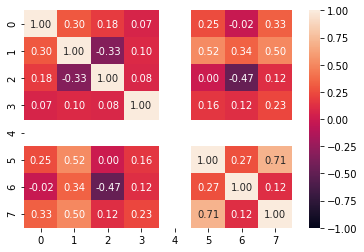

<Figure size 1440x1440 with 0 Axes>

In [81]:
import seaborn as sns

sns.heatmap(pd.DataFrame(corr_matrix_model), annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.figure(figsize=(20,20))

In [87]:
# Get all interesting features for linear regression
features = ['brand', 'new', 'milage', 'power', 
          'first_registration', 'fuel', 'cilinder_content']

In [88]:
# Set X as df
X = df_lin[features]

In [82]:
# X = StandardScaler().fit_transform(X)

y = df_lin[['price']]

In [89]:
# Set train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression
model = LinearRegression().fit(X_train,y_train)

In [ ]:
r_sq = model.score(x, y)

In [91]:
# Predictions
predictions = model.predict(X_test)

In [92]:
predictions[0:5]

array([[10404.88847367],
       [ 3130.76161546],
       [ 8720.71732072],
       [10685.63630311],
       [ 2706.34787569]])

Text(0, 0.5, 'Predictions')

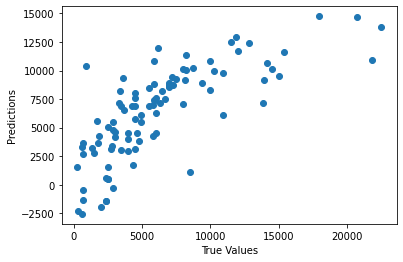

In [94]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [95]:
print("Score:", model.score(X_test, y_test))

Score: 0.549232388410096


Hi Justinas! 


dovydas mackonis also on same sprint
